In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import catboost
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn


if not 'data' in globals():
    with open('kinopoisk.jsonl', 'r') as json_file:
        data = []
        for line in json_file:
            data.append(json.loads(line))

from torch.utils.data import DataLoader, TensorDataset



df = pd.DataFrame(data)
df['X'] = df['content']
encode={"Good":2,"Bad":0,"Neutral":1}
df['Y'] = df['grade3'].map(encode)


import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from catboost import CatBoostClassifier
import torch.nn as nn

model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.classifier=nn.Dropout(0)
model.dropout = nn.Dropout(0)

x,y=[],[]
# if 'train_X' not in globals():
for i in range(len(df)):
    if i%100==0:
        print(i)
    t=df.iloc[i]['X']

    t = model(**tokenizer(t, return_tensors='pt',truncation=True, padding=True))[0].tolist()[0]
    x.append(t)
    y.append(df.iloc[i]['Y'])
        
x = np.array(x)
y = np.array(y)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
catboost = CatBoostClassifier( eval_metric='Accuracy',class_weights=weights)
catboost.fit(X_train , y_train, verbose=False,plot =True,eval_set=( X_test, y_test))

catboost.save_model('filmreview.cbm')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000


KeyboardInterrupt: 

In [81]:
catboost_model = catboost.CatBoostClassifier(random_seed=42,eval_metric='Accuracy')
catboost_model.load_model("catboost_kino.cbm")
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")
def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()


def predict(text):
    embeddings = embed_bert_cls(text, model, tokenizer)
    return catboost_model.predict_proba(embeddings.reshape(1, -1))[0]


CatBoostError: /src/catboost/catboost/libs/model/model_import_interface.h:19: Model file doesn't exist: catboost_model.cbm

In [147]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
sample_y.dtype  

torch.int64

In [150]:
from ast import mod
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split





df = pd.read_csv('toxic.csv')

x,y=[],[]

if 'train_X' not in globals():
    for i in range(len(df)):
        if i%100==0:
            print(i)
        t=df.iloc[i]['comment']

        t = model(**tokenizer(t, return_tensors='pt',truncation=True, padding=True))[0].tolist()[0]
        x.append(t)
        y.append(df.iloc[i]['toxic'])
x = np.array(x)
y = np.array(y)

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)


catboost = CatBoostClassifier( eval_metric='Accuracy',class_weights=weights)
catboost.fit(train_X, train_y, verbose=False,plot =True,eval_set=(test_X, test_y))

#save
torch.save(catboost.state_dict(), 'model.pt')


import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from catboost import CatBoostClassifier
import torch.nn as nn
catboost_model = catboost.CatBoostClassifier(random_seed=42,eval_metric='Accuracy')
catboost_model.load_model("catboost_model.cbm")
model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.classifier=nn.Dropout(0)
model.dropout = nn.Dropout(0)

def predict(text):
    t=tokenizer(text, return_tensors='pt',truncation=True, padding=True)
    t = model(**t)[0].tolist()[0]
    return t


tensor([2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
model(sample_x).dtype  

torch.float32

In [43]:
model(t['input_ids'])

tensor([[ 0.0038, -0.0042, -0.1281]], grad_fn=<AddmmBackward0>)

tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [ ]:
model

In [ ]:
from ast import mod
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split





df = pd.read_csv('toxic.csv')

x,y=[],[]

if 'train_X' not in globals():
    for i in range(len(df)):
        if i%100==0:
            print(i)
        t=df.iloc[i]['comment']

        t = model(**tokenizer(t, return_tensors='pt',truncation=True, padding=True))[0].tolist()[0]
        x.append(t)
        y.append(df.iloc[i]['toxic'])
x = np.array(x)
y = np.array(y)

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
catboost = CatBoostClassifier( eval_metric='Accuracy',class_weights=weights)
catboost.fit(train_X, train_y, verbose=False,plot =True,eval_set=(test_X, test_y))

#save
torch.save(catboost.state_dict(), 'model.pt')


import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from catboost import CatBoostClassifier
import torch.nn as nn
catboost_model = catboost.CatBoostClassifier(random_seed=42,eval_metric='Accuracy')
catboost_model.load_model("catboost_model.cbm")
model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.classifier=nn.Dropout(0)
model.dropout = nn.Dropout(0)

def predict(text):
    t=tokenizer(text, return_tensors='pt',truncation=True, padding=True)
    t = model(**t)[0].tolist()[0]
    return t


In [34]:
catboost.save_model('dont_be_toxic.cbm')

In [79]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from catboost import CatBoostClassifier
import torch.nn as nn

catboost_model = CatBoostClassifier(random_seed=42,eval_metric='Accuracy')
catboost_model.load_model("../anti_toxic/dont_be_toxic.cbm")
model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
model.classifier=nn.Dropout(0)
model.dropout = nn.Dropout(0)

def predict(text):
    t=tokenizer(text, return_tensors='pt',truncation=True, padding=True)
    t = model(**t)[0].tolist()[0]
    return catboost_model.predict_proba(t)


array([0.04576194, 0.95423806])

IndexError: invalid index to scalar variable.

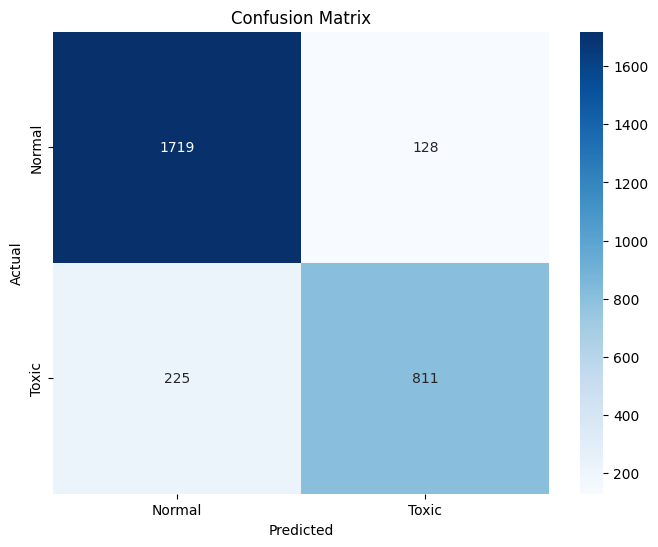

Weighted F1-score: 0.8761177534326371
Classification Report:
              precision    recall  f1-score   support

      Normal       0.88      0.93      0.91      1847
       Toxic       0.86      0.78      0.82      1036

    accuracy                           0.88      2883
   macro avg       0.87      0.86      0.86      2883
weighted avg       0.88      0.88      0.88      2883



In [33]:

import torch



def ultrareport(all_preds, all_targets,classes):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report, f1_score

    def plot_confusion_matrix(y_true, y_pred, classes):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()


    plot_confusion_matrix(all_targets, all_preds, classes)

    f1 = f1_score(all_targets, all_preds, average='weighted')
    report = classification_report(all_targets, all_preds, target_names=classes)
    print("Weighted F1-score:", f1)
    print("Classification Report:")
    print(report)

classes = ["Normal", "Toxic"]
all_preds, all_targets = test_y, catboost.predict(test_X)
ultrareport(all_preds, all_targets,classes)


In [29]:
weights

array([5.        , 0.55555556])

In [25]:
df['toxic'].describe()

count    14412.000000
mean         0.334860
std          0.471958
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: toxic, dtype: float64